# Encoding Time Series Data as Image Fields #

In this experiment, we import the GunPoint data into the Aretas platform and export as Gramian Image fields.

The GunPoint dataset information can be found here: http://www.timeseriesclassification.com/description.php?Dataset=GunPoint

This model, using image fields, compares well to the best performing model on the site on previously unseen data (98%)

We incluide the best performing model for reference in the GitHub repo. 

In [1]:
from fastai.vision.all import *

In [2]:
image_data_path = Path("Y:/ai-time-series-classification-export-gaf/GunPoint/test")

In [3]:
image_data_path.ls()

(#3) [Path('Y:/ai-time-series-classification-export-gaf/GunPoint/test/1'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/test/2'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/test/models')]

In [4]:
files = get_image_files(image_data_path)

In [5]:
len(files)

150

In [6]:
files[0]

Path('Y:/ai-time-series-classification-export-gaf/GunPoint/test/1/102.png')

In [7]:
files[0].parts[len(files[0].parts)-2]

'1'

In [8]:
def label_func(f):
    label = f.parts[len(f.parts)-2]
    return label


In [9]:
set_seed(8008, True)
dls = ImageDataLoaders.from_path_func(image_data_path, files, label_func,valid_pct=0.2, bs=32, item_tfms=Resize((200,200), ResizeMethod.Squish))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


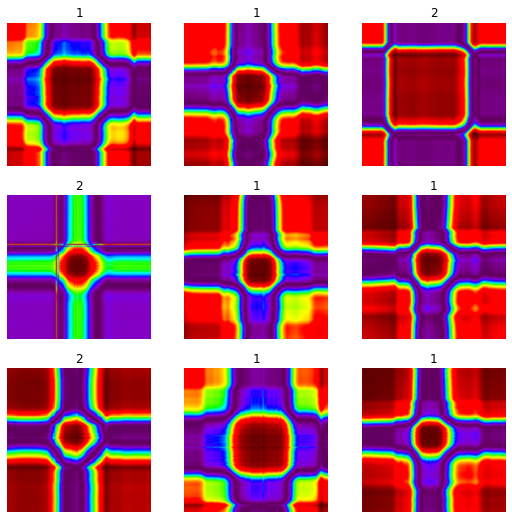

In [10]:
dls.show_batch()

SuggestedLRs(valley=9.120108734350652e-05)

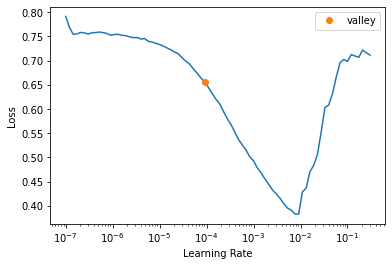

In [11]:
set_seed(8008, True)
learn = Learner(dls, xresnet50(n_out=2), metrics=accuracy)
learn.lr_find(num_it=100)

In [12]:
lr = 0.0001
learn.fine_tune(13)

epoch,train_loss,valid_loss,accuracy,time
0,0.753637,0.674301,0.566667,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.263974,0.591421,0.766667,00:02
1,0.224860,0.511598,0.866667,00:02
2,0.166887,0.497416,0.766667,00:02
3,0.135053,0.340337,0.866667,00:02
4,0.113027,0.510150,0.866667,00:02
5,0.103333,0.260062,0.866667,00:02
6,0.090342,0.953018,0.633333,00:02
7,0.078195,1.299104,0.566667,00:02
8,0.068810,0.685138,0.800000,00:02
9,0.060692,0.376507,0.866667,00:02


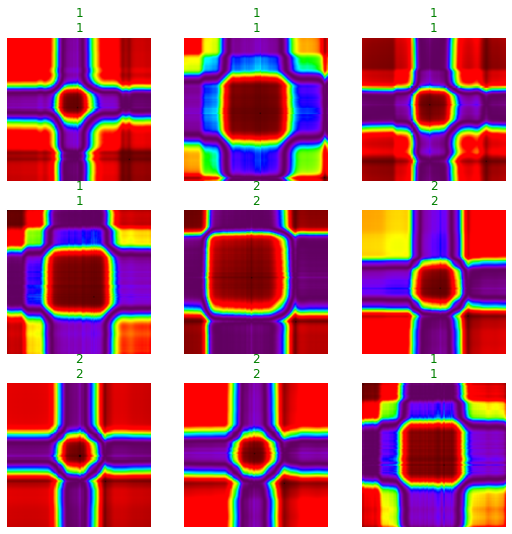

In [13]:
learn.show_results()

In [14]:
interp = Interpretation.from_learner(learn)

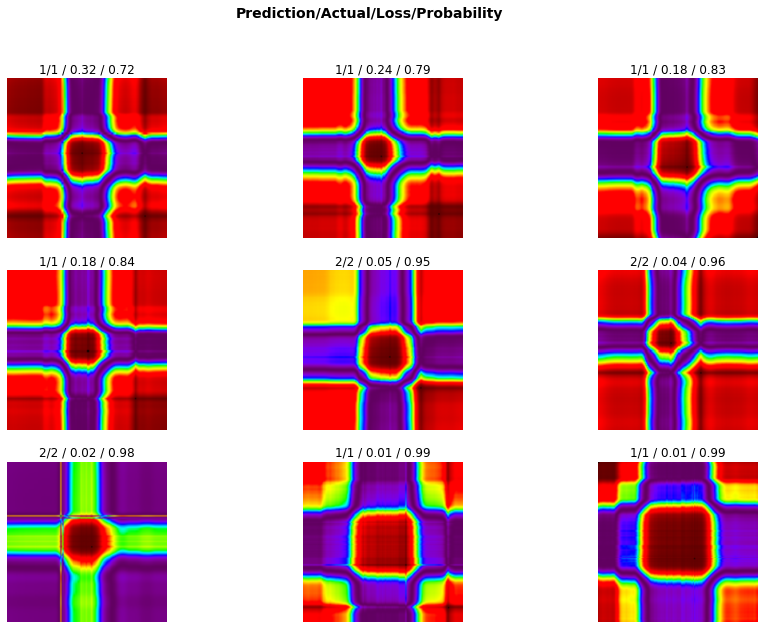

In [15]:
interp.plot_top_losses(9, figsize=(15,10))

In [16]:
test_set_path = Path("Y:/ai-time-series-classification-export-gaf/GunPoint/train")
test_set_images = get_image_files(test_set_path)
test_set_images

(#50) [Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/10.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/11.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/12.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/13.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/15.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/18.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/2.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/20.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/21.png'),Path('Y:/ai-time-series-classification-export-gaf/GunPoint/train/1/22.png')...]

In [17]:
accuracy = [[0.0,0.0],[0.0,0.0]]
for i in test_set_images:
    result = learn.predict(i)
    actual = i.parts[len(i.parts)-2]
    prediction = result[0]
    print("---------------------------------")
    print("Actual:" + actual)
    print("Prediction:" + result[0])
    target_prob = result[2][0];
    print(float(target_prob))
    print(result)
    print("---------------------------------")
    print('\n')
    
    # true positive
    if(actual == '1' and prediction == '1'):
        accuracy[0][0] = accuracy[0][0] + 1.0
    
    # false negative
    if(actual == '1' and prediction != '1'):
        accuracy[1][0] = accuracy[1][0] + 1.0
        
    #false positive
    if(actual != '1' and prediction == '1'):
        accuracy[0][1] = accuracy[0][1] + 1.0
        
    #true negative
    if(actual != '1' and prediction != '1'):
        accuracy[1][1] = accuracy[1][1] + 1.0

---------------------------------
Actual:1
Prediction:1
0.9999572038650513
('1', TensorBase(0), TensorBase([9.9996e-01, 4.2736e-05]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.999322772026062
('1', TensorBase(0), TensorBase([9.9932e-01, 6.7724e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9999970197677612
('1', TensorBase(0), TensorBase([1.0000e+00, 2.9586e-06]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9980975985527039
('1', TensorBase(0), TensorBase([0.9981, 0.0019]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9996820688247681
('1', TensorBase(0), TensorBase([9.9968e-01, 3.1795e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9914944171905518
('1', TensorBase(0), TensorBase([0.9915, 0.0085]))
---------------------------------




---------------------------------
Actual:1
Prediction:2
0.2969103157520294
('2', TensorBase(1), TensorBase([0.2969, 0.7031]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9149274230003357
('1', TensorBase(0), TensorBase([0.9149, 0.0851]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9983866214752197
('1', TensorBase(0), TensorBase([0.9984, 0.0016]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9998791217803955
('1', TensorBase(0), TensorBase([9.9988e-01, 1.2086e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.6758972406387329
('1', TensorBase(0), TensorBase([0.6759, 0.3241]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9988901019096375
('1', TensorBase(0), TensorBase([0.9989, 0.0011]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9997465014457703
('1', TensorBase(0), TensorBase([9.9975e-01, 2.5353e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9999958276748657
('1', TensorBase(0), TensorBase([1.0000e+00, 4.1461e-06]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9730619192123413
('1', TensorBase(0), TensorBase([0.9731, 0.0269]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9997820258140564
('1', TensorBase(0), TensorBase([9.9978e-01, 2.1802e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.8234302997589111
('1', TensorBase(0), TensorBase([0.8234, 0.1766]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9348365664482117
('1', TensorBase(0), TensorBase([0.9348, 0.0652]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9999399185180664
('1', TensorBase(0), TensorBase([9.9994e-01, 6.0051e-05]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9996286630630493
('1', TensorBase(0), TensorBase([9.9963e-01, 3.7137e-04]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9999963045120239
('1', TensorBase(0), TensorBase([1.0000e+00, 3.7477e-06]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9894124865531921
('1', TensorBase(0), TensorBase([0.9894, 0.0106]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9232628345489502
('1', TensorBase(0), TensorBase([0.9233, 0.0767]))
---------------------------------




---------------------------------
Actual:1
Prediction:1
0.9996424913406372
('1', TensorBase(0), TensorBase([9.9964e-01, 3.5746e-04]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
7.733651000307873e-05
('2', TensorBase(1), TensorBase([7.7337e-05, 9.9992e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0001278107229154557
('2', TensorBase(1), TensorBase([1.2781e-04, 9.9987e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.012571322731673717
('2', TensorBase(1), TensorBase([0.0126, 0.9874]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
6.062474494683556e-05
('2', TensorBase(1), TensorBase([6.0625e-05, 9.9994e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.00054987269686535
('2', TensorBase(1), TensorBase([5.4987e-04, 9.9945e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
5.341751966625452e-05
('2', TensorBase(1), TensorBase([5.3418e-05, 9.9995e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
1.6294711713271681e-06
('2', TensorBase(1), TensorBase([1.6295e-06, 1.0000e+00]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.00022965687094256282
('2', TensorBase(1), TensorBase([2.2966e-04, 9.9977e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
2.2308942789095454e-05
('2', TensorBase(1), TensorBase([2.2309e-05, 9.9998e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
3.956045020458987e-06
('2', TensorBase(1), TensorBase([3.9560e-06, 1.0000e+00]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
7.25345489627216e-06
('2', TensorBase(1), TensorBase([7.2535e-06, 9.9999e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0002527371980249882
('2', TensorBase(1), TensorBase([2.5274e-04, 9.9975e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.00012315607455093414
('2', TensorBase(1), TensorBase([1.2316e-04, 9.9988e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0007213788339868188
('2', TensorBase(1), TensorBase([7.2138e-04, 9.9928e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
7.872322385082953e-06
('2', TensorBase(1), TensorBase([7.8723e-06, 9.9999e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
2.6045656795758987e-06
('2', TensorBase(1), TensorBase([2.6046e-06, 1.0000e+00]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0009162062779068947
('2', TensorBase(1), TensorBase([9.1621e-04, 9.9908e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
3.7337158573791385e-05
('2', TensorBase(1), TensorBase([3.7337e-05, 9.9996e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
5.8866975450655445e-05
('2', TensorBase(1), TensorBase([5.8867e-05, 9.9994e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0023253927938640118
('2', TensorBase(1), TensorBase([0.0023, 0.9977]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.020107507705688477
('2', TensorBase(1), TensorBase([0.0201, 0.9799]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
2.8958624170627445e-05
('2', TensorBase(1), TensorBase([2.8959e-05, 9.9997e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
0.0021409171167761087
('2', TensorBase(1), TensorBase([0.0021, 0.9979]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
3.076823122682981e-05
('2', TensorBase(1), TensorBase([3.0768e-05, 9.9997e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
2.138409217877779e-05
('2', TensorBase(1), TensorBase([2.1384e-05, 9.9998e-01]))
---------------------------------




---------------------------------
Actual:2
Prediction:2
2.1002897483413108e-05
('2', TensorBase(1), TensorBase([2.1003e-05, 9.9998e-01]))
---------------------------------




Confustion matrix:

In [18]:
from IPython.display import display, HTML
display(HTML(pd.DataFrame(accuracy).to_html()))

,0,1
0,23.0,0.0
1,1.0,26.0


In [19]:
# accuracy
accuracy_t = Tensor(accuracy)
accuracy_val = accuracy_t.trace() / accuracy_t.sum()
print(accuracy_val)

tensor(0.9800)


In [21]:
# learn.export("GunpointGAF_best_98pct_accuracy.pkl")